# Predicting heart disease using ML

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine model capable of predicting whether or not someone has heart disease based on their medical attributes

## What is classification?

Classification involves deciding whether a sample is part of one class or another (single-class classification). If there are multiple class options, it's referred to as **multi-class classification**.

## What we'll end up with¶
Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="../images/ml101-6-step-ml-framework.png" width=500/> |
|:--:|
| 6 Step Machine Learning Modelling Framework ([read more](https://whimsical.com/9g65jgoRYTxMXxDosndYTB)) |

More specifically, we'll look at the following topics.
* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics. 
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of heart disease, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn 
for machine learning and modelling tasks

| <img src="../images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/>|
|:--:|
|Tools which can be used for each step of the machine learning modelling process.|

**We're going to take the following approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).\
This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.


In a statement, 
> Given clinical parameters about patients, can we predict whether or not they has heart disease?

## 2. Data


What you'll want to do here is dive into the data your problem definition is based on. This may involve, sourcing, defining different parameters, talking to experts about it and finding out what you should expect.

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci/).

The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

Attributes and features are also referred to as **independent variables** and a target variable can be referred to as a **dependent variable**.

> We use the independent variables to predict our dependent variable.

Or in our case, the independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.


## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since machine learning is very experimental, you might say something like, 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

The reason this is helpful is it provides a rough goal for a machine learning engineer or data scientist to work towards.

However, due to the nature of experimentation, the evaluation metric may change over time.

## 4. Features 

TFeatures are different parts of the data. During this step, you'll want to start finding out what you can about the data.

One of the most common ways to do this, is to create a **data dictionary**.

### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. Not all datasets come with them so this is where you may have to do your research or ask a **subject matter expert** (someone who knows about the data) for more.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

**Note:** No personal identifiable information (PPI) can be found in the dataset.

It's a good idea to save these to a Python dictionary or in an external file, so we can look at them later without coming back here.

## Remember we are following Scikit-learn machine learning map

<img src="../images/ml_map.png" width=800/>

## Import relevant libriries

In [1]:
# Getting data ready ( Thư viện để xử lý, làm mịn dữ liệu)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Modelling ( Mô hình cho dự đoán Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Evaluating models ( Đánh giá mô hình )
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.model_selection import train_test_split, cross_val_score

## Load data ( Import data ) 

In [53]:
df = pd.read_csv("../data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA ( Exploring data analysis)  

The goal is to find out more about the data and become a subject matter export on dataset we're working with: 
(Khám phá tổng quan về dữ liệu, tìm hiểu các thuộc tính, phân tích, định nghĩa về đặc tính của dữ liệu. Phần này ta chưa đi sâu về làm mịn dữ liệu, cần tìm hiểu ý nghĩa của các thuộc tính trong thực tế.). Cần trả lời được một số câu hỏi sau : 
1. What questions are we trying to resolve? ( Mục đích cuối cùng mà bạn theo đuổi dữ liệu này là gì ? )
2. What kind of data do we have and how to solve different types ? ( Dữ liệu mà chúng ta có thưộc loại gì và làm như thế nào để xử lý được các kiểu dữ liệu khác nhau? )
3. What's missing values from data and how to deal with it ? ( Dữ liệu thiếu sót là không thể tránh khỏi, vậy kiểu dử liệu thiếu sót trong data là gì, làm như thế nào để làm mịn được nó ? ) 
4. Where / What are the outliers and why should we care about them? ( Giá trị ngoại lai là gì, làm như thế nào để biết được nó và tại sao ta lại quan tâm đến nó ? )
5. How do we add, change or remove features to get more our data? ( Khi đã có được dữ liệu, chúng ta sẽ tìm cách làm mịn dữ liệu trước khi đưa chúng vào mô hình vậy làm như thế nào để  thêm, sửa, xóa dữ các thuộc tính để có được dữ liệu tối ưu hơn ? )

### 1. age

<AxesSubplot:ylabel='Frequency'>

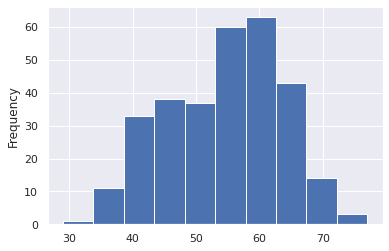

In [3]:
df.age.plot(kind="hist")

From hist plot, we see heart disease is distributed the most for the people from 55 to 60 \
Từ biểu đồ, ta thấy bệnh tim tập trung nhiều nhất từ những người 55 đến 60

### 2. sex (1 = male; 0 = female) 

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

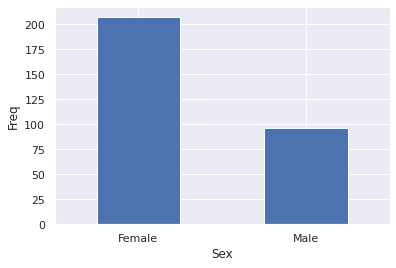

In [4]:
sex = df.sex.value_counts()
sex.index = ["Female", "Male"]
sex.plot(kind="bar")
plt.xlabel("Sex")
plt.ylabel("Freq")
plt.xticks(rotation=0)

In [5]:
df_sex_target = pd.crosstab(df.sex,df.target) 
df_sex_target = df_sex_target.rename(index={0: "Female",1:"Male"},columns={0 : "Not diease", 1: "Disease"})
df_sex_target

target,Not diease,Disease
sex,,
Female,24,72
Male,114,93


<AxesSubplot:xlabel='sex'>

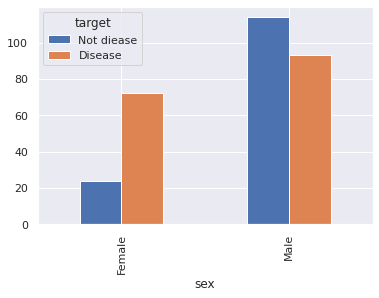

In [6]:
df_sex_target.plot(kind="bar")

- In the graph, we see the number of female people has heart diease more than male people
* With Female people, the number of people is not disease is 24, but the one is disease is 72, that meansthe number of people who is not diease equal 1/3 who is disease by proportion
* With Male people, the number of people is not disease is 114, but the one is disease is 93, that meansthe number of people who is not diease approximately equal who is disease by proportion


<AxesSubplot:xlabel='target', ylabel='sex'>

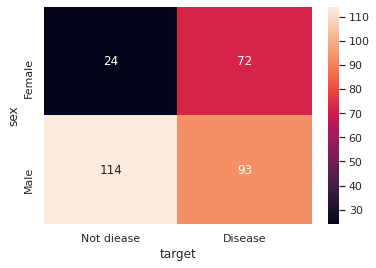

In [7]:
# We can use sns.heatmap to show the graph
sns.heatmap(df_sex_target, annot=True, fmt=".0f")

### 3.  cp - chest pain type 

* 0: Typical angina: chest pain related decrease blood supply to the heart( Đau thắt ngực điển hình: đau ngực liên quan đến giảm cung cấp máu cho tim) 
* 1: Atypical angina: chest pain not related to heart ( Đau thắt ngực không điển hình: đau ngực không liên quan đến tim)
* 2: Non-anginal pain: typically esophageal spasms (non heart related) ( Đau không do đau thắt ngực: thường là co thắt thực quản (không liên quan đến tim)
* 3: Asymptomatic: chest pain not showing signs of disease ( Không có triệu chứng: đau ngực không có dấu hiệu của bệnh)

In [8]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:>

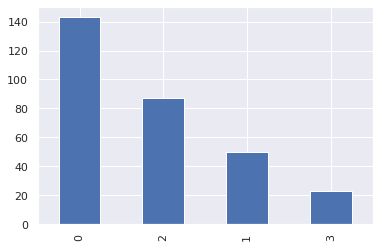

In [9]:
df.cp.value_counts().plot(kind="bar")

In [10]:
df_cp_target = pd.crosstab(df.cp,df.target)
df_cp_target.columns = ["Not disease", "disease"]
df_cp_target

,Not disease,disease
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


<AxesSubplot:xlabel='cp'>

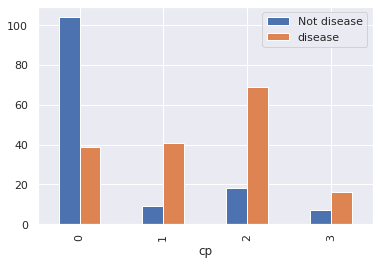

In [11]:
df_cp_target.plot(kind="bar")

### 4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
Huyết áp lúc nghỉ (tính bằng mm Hg khi nhập viện)

In [12]:
df.trestbps.unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164])

In [13]:
df.trestbps.mean()

131.62376237623764

### 5. thalach - maximum heart rate achieved (nhịp tim tối đa đạt được)

In [14]:
df.thalach

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

Text(0, 0.5, 'Freq')

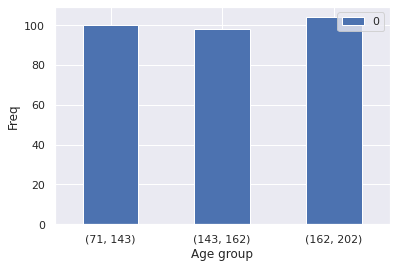

In [15]:
thalach = df.thalach.sort_values()
thalach_split_group = np.array_split(thalach, 3)
thalach_range = [];
thalach_frequency = []
for i,l in enumerate(thalach_split_group) : 
    thalach_range.append((thalach_split_group[i].min(), thalach_split_group[i].max()))
    
for i,tple in enumerate(thalach_range) :     
    thalach_frequency.append( (thalach[(thalach >= tple[0]) & (thalach < tple[1])]).count() )
    
df_thalach = pd.DataFrame(thalach_frequency, index=thalach_range )
df_thalach.plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Age group")
plt.ylabel("Freq")

### The relationship between age and thalach 

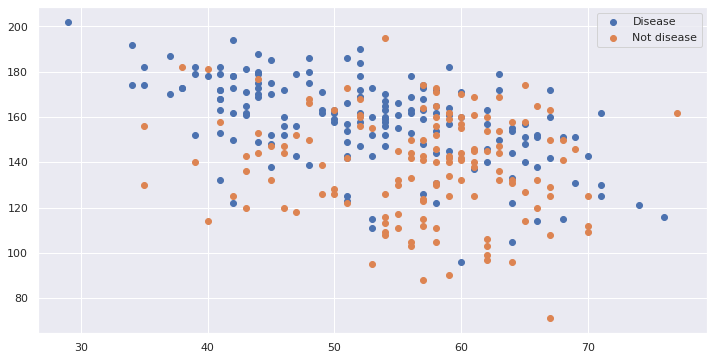

In [16]:
fig,ax = plt.subplots(figsize=(12,6))
ax.scatter(df.age[df.target == 1],df.thalach[df.target==1], label="Disease")
ax.scatter(df.age[df.target == 0],df.thalach[df.target == 0], label="Not disease")
ax.legend()

### 6. thal - thalium stress result

* 1,3: normal
* 6: fixed defect: used to be defect but ok now
* 7: reversable defect: no proper blood movement when excercising

In [17]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

Well, everything is normal !!

## Correlation Table

<AxesSubplot:>

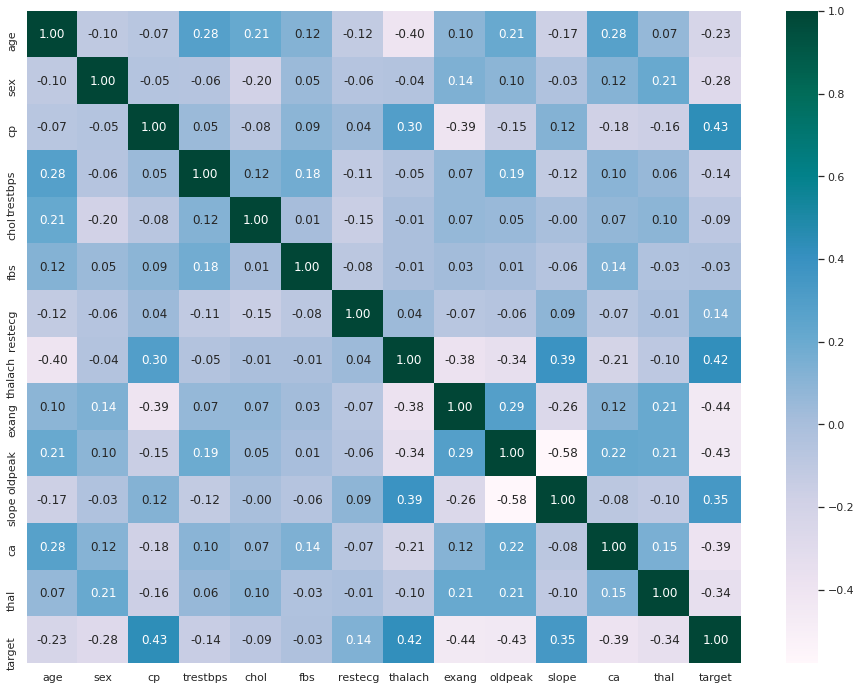

In [18]:
plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="PuBuGn")

### Check categorical features

In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**data has no categorical features**

### Check missing value

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**data has no missing values**

## Modelling

We are going to try 3 different machine learning models: 
1. LogisticRegression
2. KNeighborClassifier
3. RandomForestsClassifier

In [21]:
# split data into x,y
x = df.drop("target",axis=1)
y = df["target"]

In [22]:
# setup random seed
np.random.seed(42)
# split into trainning and testing sets 
x_train, x_test,y_train, y_test = train_test_split(x,y, train_size=0.8)

In [23]:
# setup random seed
np.random.seed(42)
# create models dictionary
models = {
    "LReg": LogisticRegression(), 
    "KNB": KNeighborsClassifier(),
    "RDC": RandomForestClassifier() 
}

def fit_and_scores(models) : 
    """
    Fits and evaluate given machine learning models.
    models: a dict of difference Scikit-learn machine learning models
    x_train: trainning data (no labels)
    x_test: testing data(no labels)
    y_train: trainning labels
    y_test: testing labels    
    """
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models 
    for name,model in models.items() : 
        # Fit model to data 
        model.fit(x_train, y_train)
        # Evaluate model
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

model_scores = fit_and_scores(models)
model_scores

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LReg': 0.8852459016393442,
 'KNB': 0.6885245901639344,
 'RDC': 0.8360655737704918}

### Model comparison

(array([0, 1, 2]), [Text(0, 0, 'LReg'), Text(1, 0, 'KNB'), Text(2, 0, 'RDC')])

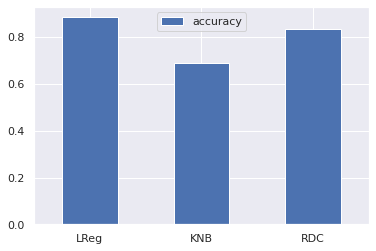

In [24]:
pd.DataFrame(model_scores, index=["accuracy"]).T.plot(kind="bar")
plt.xticks(rotation=0)

Now we have got a baseline models. However, we knew a model's first predictions aren't always what we should expect, we should based our next steps off. What should we do ? ( Giờ đây, ta đã có mô hình cơ bản. Tuy nhiên, như đã biết lần dự đoán đầu tiên ta sẽ không kỳ vọng quá nhiều vào sự chính xác của nó, ta cần thêm một vài bước để cải thiện mô hình )

Let's  look a following steps : 
1. Hyperparameter tuning ( Thay đổi tham số của mô hình )
2. Feature importance ( Các đặc tính quan trọng của mô hình ) 
3. Confusion matrix ( Ma trận tổng hợp )
4. Cross validation ( Kiểm định chéo )
5. precision ( độ tin cậy )
6. recall 
7. f1 score
8. Classification report 
9. ROC curve
10. Area under the curve (AUC)

## Hyperparameter tuning ( by hand)

Ta thấy mô hình KNeigborClassifier có độ chính xác thấp nhất trong số 3 mô hình, ta sẽ thay đổi tham số để cải thiện mô hình

In [25]:
train_scores = []
test_scores = []

# Create list different values in n_estimators
neighbors = np.arange(1,21)

knn = KNeighborsClassifier()

for i in neighbors : 
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
train_scores, test_scores

([1.0,
  0.8099173553719008,
  0.7727272727272727,
  0.743801652892562,
  0.7603305785123967,
  0.7520661157024794,
  0.743801652892562,
  0.7231404958677686,
  0.71900826446281,
  0.6942148760330579,
  0.7272727272727273,
  0.6983471074380165,
  0.6900826446280992,
  0.6942148760330579,
  0.6859504132231405,
  0.6735537190082644,
  0.6859504132231405,
  0.6652892561983471,
  0.6818181818181818,
  0.6694214876033058],
 [0.6229508196721312,
  0.639344262295082,
  0.6557377049180327,
  0.6721311475409836,
  0.6885245901639344,
  0.7213114754098361,
  0.7049180327868853,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.7540983606557377,
  0.7377049180327869,
  0.7377049180327869,
  0.7377049180327869,
  0.6885245901639344,
  0.7213114754098361,
  0.6885245901639344,
  0.6885245901639344,
  0.7049180327868853,
  0.6557377049180327])

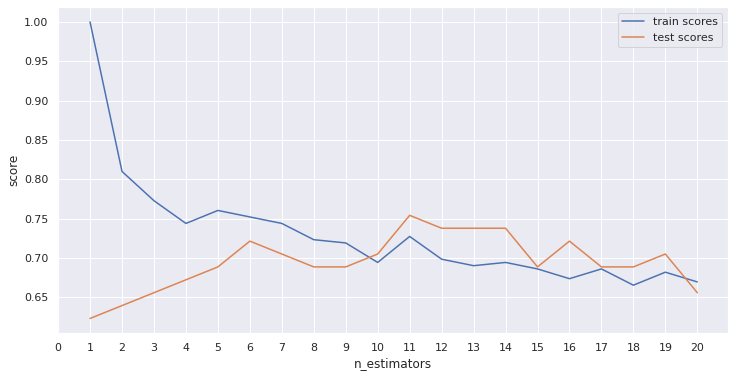

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(neighbors,train_scores, label="train scores")
ax.plot(neighbors,test_scores, label="test scores")
ax.set(xlabel="n_estimators",ylabel="score")
ax.set_xticks(np.arange(21))
ax.legend()

We are able to see test score get highest score at 11 \
Ta có thể thấy test score đạt điểm cao nhất tại n_estimator là 11 

In [27]:
# Try model with n_estimator=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

0.7540983606557377

The score of KNN has been improved, but it still smaller than 2 others\
Woo, score của mô hình đã được cải thiện nhưng vẫn nhỏ hơn 2 mô hình kia\
**We should get rid of this model**

## RandomizedSearchCV

### Find The best Hyperparameter of LogisticeRegression and RandomForestClassifier model 

In [28]:
# LogisticRegression Grid
log_reg_grid = {
    "C" : np.logspace(-3,3,50),
    "solver" : ["liblinear", "lbfgs"]
}

# Random Forest Grid
rf_grid = {
    "n_estimators" : np.arange(10,1000,50),
    "max_depth" : [None, 3,5,10],
    "min_samples_split" : np.arange(2,20,1),
    "min_samples_leaf" : np.arange(1,20,1),
    "max_features" : ["auto","log2",]
}

In [29]:
# setup random seed 
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
gs_log_reg = RandomizedSearchCV(LogisticRegression(n_jobs=-1), log_reg_grid,n_iter=20,cv=5,verbose=2)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=lbfgs, C=104.81131341546852 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... solver=lbfgs, C=104.81131341546852, total=   1.4s
[CV] solver=lbfgs, C=104.81131341546852 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] ............... solver=lbfgs, C=104.81131341546852, total=   0.6s
[CV] solver=lbfgs, C=104.81131341546852 ..............................
[CV] ............... solver=lbfgs, C=104.81131341546852, total=   0.5s
[CV] solver=lbfgs, C=104.81131341546852 ..............................
[CV] ............... solver=lbfgs, C=104.81131341546852, total=   0.5s
[CV] solver=lbfgs, C=104.81131341546852 ..............................
[CV] ............... solver=lbfgs, C=104.81131341546852, total=   0.0s
[CV] solver=lbfgs, C=1.5264179671752334 ..............................
[CV] ............... solver=lbfgs, C=1.5264179671752334, total=   0.0s
[CV] solver=lbfgs, C=1.5264179671752334 ..............................
[CV] ............... solver=lbfgs, C=1.5264179671752334, total=   0.1s
[CV] solver=lbfgs, C=1.5264179671752334 ..............................
[CV] ............... solver=lbfgs, C=1.5264179671752334, total=   0.0s
[CV] solver=lbfgs, C=1.5264179671752334 ..............................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] .............. solver=lbfgs, C=0.49417133613238334, total=   0.1s
[CV] solver=lbfgs, C=0.49417133613238334 .............................
[CV] .............. solver=lbfgs, C=0.49417133613238334, total=   0.1s
[CV] solver=lbfgs, C=0.49417133613238334 .............................
[CV] .............. solver=lbfgs, C=0.49417133613238334, total=   0.0s
[CV] solver=lbfgs, C=0.49417133613238334 .............................
[CV] .............. solver=lbfgs, C=0.49417133613238334, total=   0.0s
[CV] solver=liblinear, C=0.49417133613238334 .........................
[CV] .......... solver=liblinear, C=0.49417133613238334, total=   0.0s
[CV] solver=liblinear, C=0.49417133613238334 .........................
[CV] .......... solver=liblinear, C=0.49417133613238334, total=   0.0s
[CV] solver=liblinear, C=0.49417133613238334 .........................
[CV] .......... solver=liblinear, C=0.49417133613238334, total=   0.0s
[CV] solver=liblinear, C=0.49417133613238334 .........................


/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] .......... solver=liblinear, C=0.49417133613238334, total=   0.0s
[CV] solver=liblinear, C=0.49417133613238334 .........................
[CV] .......... solver=liblinear, C=0.49417133613238334, total=   0.0s
[CV] solver=lbfgs, C=0.21209508879201905 .............................
[CV] .............. solver=lbfgs, C=0.21209508879201905, total=   0.1s
[CV] solver=lbfgs, C=0.21209508879201905 .............................
[CV] .............. solver=lbfgs, C=0.21209508879201905, total=   0.0s
[CV] solver=lbfgs, C=0.21209508879201905 .............................
[CV] .............. solver=lbfgs, C=0.21209508879201905, total=   0.1s
[CV] solver=lbfgs, C=0.21209508879201905 .............................
[CV] .............. solver=lbfgs, C=0.21209508879201905, total=   0.0s
[CV] solver=lbfgs, C=0.21209508879201905 .............................
[CV] .............. solver=lbfgs, C=0.21209508879201905, total=   0.1s
[CV] solver=liblinear, C=0.022229964825261943 ........................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] ........................ solver=liblinear, C=0.001, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........................ solver=liblinear, C=0.001, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........................ solver=liblinear, C=0.001, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........................ solver=liblinear, C=0.001, total=   0.0s
[CV] solver=liblinear, C=0.001 .......................................
[CV] ........................ solver=liblinear, C=0.001, total=   0.0s
[CV] solver=liblinear, C=0.012648552168552958 ........................
[CV] ......... solver=liblinear, C=0.012648552168552958, total=   0.0s
[CV] solver=liblinear, C=0.012648552168552958 ........................
[CV] ......... solver=liblinear, C=0.012648552168552958, total=   0.0s
[CV] solver=liblinear, C=0.012648552168552958 ........................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] ............... solver=lbfgs, C=25.595479226995334, total=   0.0s
[CV] solver=lbfgs, C=25.595479226995334 ..............................
[CV] ............... solver=lbfgs, C=25.595479226995334, total=   0.1s
[CV] solver=lbfgs, C=25.595479226995334 ..............................
[CV] ............... solver=lbfgs, C=25.595479226995334, total=   0.1s
[CV] solver=lbfgs, C=25.595479226995334 ..............................
[CV] ............... solver=lbfgs, C=25.595479226995334, total=   0.0s
[CV] solver=lbfgs, C=25.595479226995334 ..............................
[CV] ............... solver=lbfgs, C=25.595479226995334, total=   0.0s
[CV] solver=lbfgs, C=0.09102981779915217 .............................
[CV] .............. solver=lbfgs, C=0.09102981779915217, total=   0.0s
[CV] solver=lbfgs, C=0.09102981779915217 .............................
[CV] .............. solver=lbfgs, C=0.09102981779915217, total=   0.0s
[CV] solver=lbfgs, C=0.09102981779915217 .............................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] ............. solver=liblinear, C=323.745754281764, total=   0.0s
[CV] solver=liblinear, C=323.745754281764 ............................
[CV] ............. solver=liblinear, C=323.745754281764, total=   0.0s
[CV] solver=liblinear, C=323.745754281764 ............................
[CV] ............. solver=liblinear, C=323.745754281764, total=   0.0s
[CV] solver=liblinear, C=0.0017575106248547913 .......................
[CV] ........ solver=liblinear, C=0.0017575106248547913, total=   0.0s
[CV] solver=liblinear, C=0.0017575106248547913 .......................
[CV] ........ solver=liblinear, C=0.0017575106248547913, total=   0.0s
[CV] solver=liblinear, C=0.0017575106248547913 .......................
[CV] ........ solver=liblinear, C=0.0017575106248547913, total=   0.0s
[CV] solver=liblinear, C=0.0017575106248547913 .......................
[CV] ........ solver=liblinear, C=0.0017575106248547913, total=   0.0s
[CV] solver=liblinear, C=0.0017575106248547913 .......................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[CV] ................ solver=lbfgs, C=44.98432668969444, total=   0.1s
[CV] solver=lbfgs, C=44.98432668969444 ...............................
[CV] ................ solver=lbfgs, C=44.98432668969444, total=   0.1s
[CV] solver=lbfgs, C=44.98432668969444 ...............................
[CV] ................ solver=lbfgs, C=44.98432668969444, total=   0.0s
[CV] solver=lbfgs, C=44.98432668969444 ...............................
[CV] ................ solver=lbfgs, C=44.98432668969444, total=   0.1s
[CV] solver=lbfgs, C=44.98432668969444 ...............................
[CV] ................ solver=lbfgs, C=44.98432668969444, total=   0.0s
[CV] solver=liblinear, C=0.005428675439323859 ........................
[CV] ......... solver=liblinear, C=0.005428675439323859, total=   0.0s
[CV] solver=liblinear, C=0.005428675439323859 ........................
[CV] ......... solver=liblinear, C=0.005428675439323859, total=   0.0s
[CV] solver=liblinear, C=0.005428675439323859 ........................
[CV] .

/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/home/mvt/.local/lib/python3.6/site-

[CV] .............. solver=lbfgs, C=0.06866488450043001, total=   0.0s
[CV] solver=lbfgs, C=0.06866488450043001 .............................
[CV] .............. solver=lbfgs, C=0.06866488450043001, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_iter=20,
                   param_distributions={'C': array([1.00000000e-03, 1.32571137e-03, 1.75751062e-03, 2.32995181e-03,
       3.08884360e-03, 4.09491506e-03, 5.42867544e-03, 7.19685673e-03,
       9.54095476e-03, 1.26485522e-02, 1.67683294e-02, 2.22299648e-02,
       2.94705170e-02, 3.90693994e-02, 5.17947468e-02, 6.86648845e-02,
       9.10...
       2.68269580e+00, 3.55648031e+00, 4.71486636e+00, 6.25055193e+00,
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.54312006e+02, 1.00000000e+03]),
                                        'solver': ['liblinear', 'lbfgs']},
                   verbose=2)

In [30]:
gs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 0.21209508879201905}

In [31]:
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [32]:
# setup random seed 
np.random.seed(42)

# setup random hyperparameter search for RandomForestClassifier
gs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), rf_grid,n_iter=20, cv=5, verbose=2)
gs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3, total=   1.7s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3, total=   1.5s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3, total=   1.7s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3, total=   2.1s
[CV] n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3 
[CV]  n_estimators=760, min_samples_split=17, min_samples_leaf=6, max_features=auto, max_depth=3, total=   1.6s
[CV] n_estimators=10, min_samples_split=9, min_samples_leaf=3, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=9, min_samples_leaf=3, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=10, min_samples_split=9, min_sam

[CV]  n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5, total=   1.4s
[CV] n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5 
[CV]  n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5, total=   1.2s
[CV] n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5 
[CV]  n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5, total=   1.3s
[CV] n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5 
[CV]  n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5, total=   1.3s
[CV] n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5 
[CV]  n_estimators=710, min_samples_split=7, min_samples_leaf=9, max_features=log2, max_depth=5, total=   1.9s
[CV] n_estimators=110, min_samples_split=2, min_samples_leaf=

[CV]  n_estimators=460, min_samples_split=4, min_samples_leaf=3, max_features=auto, max_depth=None, total=   1.2s
[CV] n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None 
[CV]  n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None 
[CV]  n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None, total=   1.9s
[CV] n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None 
[CV]  n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None 
[CV]  n_estimators=660, min_samples_split=15, min_samples_leaf=7, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=660, min

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [33]:
gs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 17,
 'min_samples_leaf': 14,
 'max_features': 'log2',
 'max_depth': 5}

In [34]:
gs_rf.score(x_test,y_test)

0.8688524590163934

We compare score of 2 models : 
* Logistice regression : 0.8852459016393442
* Random forest classifier:  0.8688524590163934

### Evaluating our tuned ML model, beyond accuracy
* ROC curve and AUC
* matrix confusion
* classification report
* precision
* recall
* f1-score

... and it would be great if cross-validation was used where possible

To make comparisions and evaluate our trainned model, first we need to make predictions

In [35]:
y_preds= gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [36]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

#### ROC curve and AUC

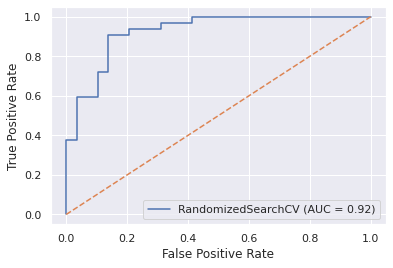

In [38]:
plot_roc_curve(gs_log_reg, x_test, y_test)
plt.plot([0,1],[0,1],"--")

#### Confusion matrix

<AxesSubplot:>

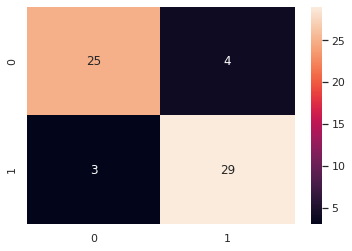

In [39]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_preds), index=[0,1], columns=[0,1])
sns.heatmap(conf_mat, annot=True)

#### classification report

In [40]:
print(classification_report(y_test,y_preds ))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calcualate evaluation metrics using cross-validation

We are going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll using `cross_val_score()`

In [41]:
gs_log_reg.best_params_

{'solver': 'lbfgs', 'C': 0.21209508879201905}

In [42]:
clf = LogisticRegression(C=0.21209508879201905, solver="liblinear")
cross_val_score(clf,x_train, y_train, cv=5)

array([0.81632653, 0.85714286, 0.8125    , 0.85416667, 0.8125    ])

In [43]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, x_train, y_train, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8305272108843538

In [44]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf, x_train, y_train, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8527860395821953

In [45]:
# Cross-validation precision
cv_pre = cross_val_score(clf, x_train, y_train, cv=5, scoring="precision")
cv_pre = np.mean(cv_pre)
cv_pre

0.8156825852946541

In [46]:
# Cross-validation recall
cv_recall = cross_val_score(clf, x_train, y_train, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.8945868945868944

<AxesSubplot:>

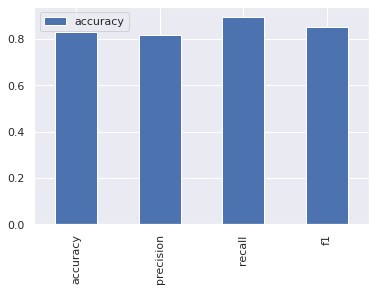

In [52]:
# Visualize cross-validation metrics 
cv_metrics = {
    "accuracy" : cv_acc,
    "precision" : cv_pre,
    "recall" : cv_recall,
    "f1" : cv_f1
}

df_metrics = pd.DataFrame(cv_metrics, index=["accuracy"]).T
df_metrics.plot(kind="bar")

## Feature importance

Features importance is another as asking, "which features contributed most to the outcomes of the models and how did they contribute ?" 

Finding feature importance is different from each of machine learning model. One way to find feature importance is to search for (MODEL NAME) fearture importance

In [48]:
# Fit an istance of LogisticRegression
clf = LogisticRegression(C=0.21209508879201905, solver="liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.21209508879201905, solver='liblinear')

In [57]:
clf.coef_.shape

(1, 13)

In [61]:
features_dict = dict(zip(df.columns.drop("target"), np.transpose(clf.coef_)))
features_dict

{'age': array([0.00332166]),
 'sex': array([-0.87334463]),
 'cp': array([0.66469539]),
 'trestbps': array([-0.01157796]),
 'chol': array([-0.00167608]),
 'fbs': array([0.04524786]),
 'restecg': array([0.31835092]),
 'thalach': array([0.02463627]),
 'exang': array([-0.61200646]),
 'oldpeak': array([-0.57062015]),
 'slope': array([0.45628271]),
 'ca': array([-0.64028265]),
 'thal': array([-0.68255683])}

<AxesSubplot:>

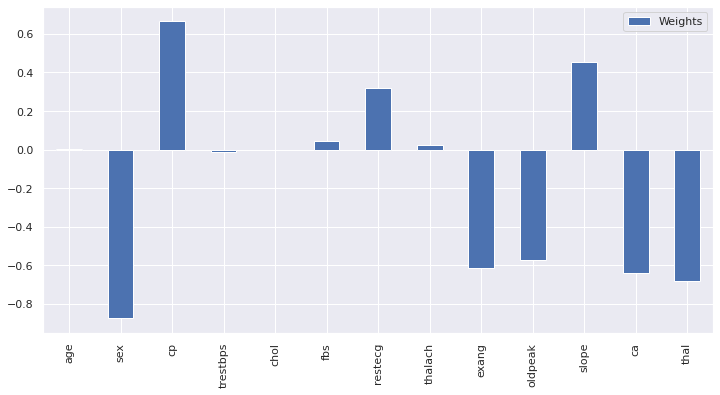

In [68]:
features_df = pd.DataFrame(features_dict, index=["Weights"])
features_df.T.plot(kind="bar", figsize=(12,6))